# Proyecto de Regularización de Regresión Lineal:

In [90]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para generar un modelo XGBoost:
import xgboost as xgb

# Librería para calcular el VIF: 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para instanciar un escalador normalizado:
from sklearn.preprocessing import StandardScaler

# Librería para el uso de modelos de Regresión Lineal:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

# Librería para utilizar métricas de evaluación de modelos de Machine Learning:
from sklearn.metrics import *

# Librería para trazar gráficos:
import matplotlib.pyplot as plt



## Paso 1 - Lectura de Datos: 

En primer lugar, es necesario **leer y guardar la información** en una variable para poder empezar a trabajar con ella.

Para ello, se ha guaradado el archivo con todos los datos en la ruta: */workspaces/regularized-linear-regression-python-project-tutorial-clara/data/demographic_health_data.csv* y se ha cargado en un Data Frame:

In [91]:
# Lectura del CSV con los datos, dada la ruta donde se guarda el archivo:
df = pd.read_csv ('/workspaces/regularized-linear-regression-python-project-tutorial-clara/data/demographic_health_data.csv');

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None);

# Se muestran las 5 primeras filas del Data Frame
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

Una vez se ha cargado correctamente la información en el Data Frame df es interesante evaluar la **cantidad de información que se tiene**. Para ello, se recurre al atributo `shape` del Data Frame:

In [92]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print (f" El conjunto de datos cuenta con información de {df.shape[0]} condados de EEUU con un total de {df.shape[1]} datos socio-demográficos y de recursos sanitarios");

 El conjunto de datos cuenta con información de 3140 condados de EEUU con un total de 108 datos socio-demográficos y de recursos sanitarios


## Paso 2 - Análisis Exploratorio de Datos Básico:

Antes de realizar un estudio de la regresión lineal regularizada, es fundamental llevar a acabo un **análisis de los datos** para poder identificar **patrones**, detectar **valores atípicos** y evaluar la distribución de las variables para comprender la **relación entre ellas**.

Por este motivo, se van a realizar distintos pasos cuyo objetivo final es **preparar el conjunto de datos** para poder trabajar con ellos. Este EDA no se explicará tan en detalle como se hizo para el proyecto dedicado únicamente a ello pero se recomienda recurrir a él para explicaciones más detalladas:

### Paso 2.1 - Análisis de Duplicados y Constantes:

Uno de los puntos críticos a la hora de realizar un análisis, es la **existencia de variables / características comunes** a todos los condados, dado que sería **información redundante** y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

In [93]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df: (df.nunique() == 1).sum())(df)} columnas en el Data Frame con un valor constante para todos los condados");

# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df.nunique()

 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los condados
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

A partir del resultado obtenido, se puede observar que **no hay ninguna constante** en los datos cargados, por lo tanto, **no hay que eliminar ninguna columna**, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar si hay **datos repetidos**, aplicado a este caso, si hay condados duplicados.

In [94]:
# Se utiliza el método .duplicated() para identificar los anuncios repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} condados duplicados.");

 Hay un total de 0 condados duplicados.


En este caso, **no se han encontrado condados duplicados** por lo que no es necesario eliminar ninguna fila del Data Frame.

### Paso 2.2 - Análisis Estadístico:

Pese a que en **otras ocasiones el análisis estadístico es muy útil** para encontrar errores en los datos o información que puede ser fraudulenta. 

Sin embargo, este caso, **no se tiene el conocimiento necesario** sobre el tema para **saber si el resumen estadístico **que provee el método `.describe()` es **coherente** o no. 

Por este motivo, **no se hará una limpieza de datos en base a información estadística**.

In [95]:
# Descripción estadística básica de todas las columnas del DataFrame:
df.describe(include='all').T;

### Paso 2.3 - Análisis de Nulos:

Uno de los problemas que es habitual encontrarse en el análisis de datos es **variables sin valor**, nulos.

Es por ello que se deben tratar estos casos para o bien **eliminarlos** o bien **rellenarlos** con un valor coherente para cada uno.

En primer lugar, para realizar el análisis, se va a obtener el **porcentaje de condados que presentan al menos un nulo** en alguna de las características. 

In [96]:
# Se comprueba el porcentaje de condados que presentan al menos un valor nulo:
print(f" El {round(df.isnull().any(axis=1).mean()*100, 2)} % de los condados presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 0.0 % de los condados presenta, al menos, un valor nulo en alguna de sus características descriptivas


Se comprueba que **no hay ningún valor faltante** en nuestro conjunto de datos, por lo que **no se tiene por qué inferir información** en ningún caso.

### Paso 2.4 - Análisis de Observaciones Influyentes:

En este paso se va a proceder a realizar uno de los puntos clave en el Análisis Exploratorio de Datos, la Identificación de **Observaciones Influyentes**.

Sin embargo, para poder realizar este paso, es necesario que **todas las variables con las que se trabaja sean numéricas**. Por este motivo, en primer lugar, se va a comprobar si hay alguna variable catégorica utilizando el método `.describe()` con el parámetro `include = 'object'`:

In [97]:
# Descripción estadística básica de todas las columnas del DataFrame:
df.describe(include = 'object').T

,count,unique,top,freq
COUNTY_NAME,3140,1841,Washington,31
STATE_NAME,3140,51,Texas,254


En este caso, no se tiene un criterio determinado por el cual se desee codificar estas variables. Por ello, simplemente se va a utilizar una instancia de un `LabelEncoder()`de la librería `scikit-learn`.

In [98]:
# Se crea una instancia del codificador:
encoder = LabelEncoder();

# Se codifican las características categóricas a numéricas:
df['COUNTY_NAME_num'] = encoder.fit_transform(df['COUNTY_NAME']);
df['STATE_NAME_num'] = encoder.fit_transform(df['STATE_NAME']);

# Se borran las características categóricas del conjunto de datos:
df.drop(['COUNTY_NAME', 'STATE_NAME'], axis = 1, inplace = True);

# Se comprueba que ya no quedan columnas categóricas:
try:
    # Se intenta obtener el resumen de las columnas categóricas
    print(df.describe(include='object')).T
except Exception:
    # Si hay un error, es porque no hay columnas categóricas:
    print("No hay variables categóricas en el conjunto de datos.")

No hay variables categóricas en el conjunto de datos.


Una vez ya se cuenta con todas las características numéricas, se puede proceder a **identificar las observaciones influyentes**. 

Para ello, en primer lugar es necesario identificar cuál será, de ahora en adelante la **variable dependiente**, es decir, la variable a *predecir* y separar tanto esta como todas las relacionadas con ella. 

En este caso, la **variable a predecir** debía estar relacionada con la salud, por lo que se ha escogido **`Obesity_number`**. Teniendo esto en cuenta, para separar las variables independientes habrá que extraer tanto esta columna como: `Obesity_prevalence` , `Obesity_Lower 95% CI` , `Obesity_Upper 95% CI`.

In [99]:
# Se separa la variable dependiente: 
y = df ['Obesity_number'];

# Se guardan las variables independientes en una matrix, eliminando las características relacionadas con la dependiente:
X = df.drop(['Obesity_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI'], axis = 1);

Ahora que se tienen los datos separados, se puede proceder a la identificación de observaciones influyentes a partir del estudio de la **Distancia de Cook**.

Este parámetro ayuda a evaluar la **influencia de una observación** mediante los coeficientes de un **modelo de regresión lineal**. Si la Distancia de Cook de una observación es alta, significa que dicho dato puede estar alterando de forma muy notable el ajuste del modelo.

In [100]:
# Se incluye el término de ordenada en el origen: 
X = sm.add_constant (X);

# Se ajusta el modelo de Regresión Lineal Ordinaria: 
model_OLS = sm.OLS(y, X).fit();

# Se hace un diagnóstico de influencia y se extrae la Distancia de Cook: 
cooks_distance = model_OLS.get_influence().cooks_distance;

Hay una norma estándar que establece un **punto de corte para la Distancia de Cook**, a partir de la cual está aceptado que la información dentro de un conjunto de datos presente. Dicho límite es la **cuarta parte de la longitud total del DataFrame:**

In [101]:
# Se define el Punto de Corte:
cut_point = 4/len(df);

# Se comprueba cuántas viviendas están por encima de ese punto de corte:
print(f" Hay un total de {len(np.where(cooks_distance[0]>cut_point)[0])} observaciones que se encuentran por encima del punto de corte");

# Se eliminan las observaciones influyentes:
df_clean = df.drop(np.where(cooks_distance[0] > cut_point)[0]);


 Hay un total de 195 observaciones que se encuentran por encima del punto de corte


### Paso 2.5 - Análisis de Características Relevantes:

Continuando con el proceso de preparación y compresión del conjunto de datos que implica un Análisis Exploratorio. se va a realizar una **Selección de Características**.

Para ello, se va a utilizar un modelo de regresión basado en **XGBoost**, un algoritmo basado en árboles de decisión que utiliza boosting para mejorar la precisión. Por este motivo, el primer paso ha de ser separar el conjunto de datos teniendo una partición para entrenar al modelo (train) y otro para probarlo (test), de forma que se pueda evaluar sin inferir en el modelo su capacidad predictiva.

In [102]:
# Se separa la variable dependiente: 
y = df_clean ['Obesity_number'];

# Se guardan las variables independientes en una matrix, eliminando las características relacionadas con la dependiente:
X = df_clean.drop(['Obesity_number','Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI'], axis = 1);

# Se realiza la partición, explicitando el tamaño del test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

# Se crea un modelo de regresión XGBoost y se entrena con los datos del 'train_set':
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42).fit(X_train, y_train);

Una vez se tiene el modelo entrenado, se va a generar un DataFrame que contenga el nombre cada característica y su importancia en valor porcentual:

In [103]:
# Se extrae la importancia de cada característica en porcentaje y se guarda en un Data Frame:
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100});

# Se ordena el Data Frame en orden de mayor a menor importancia:
df_imp = df_imp.sort_values(by='Importance', ascending=False);

# Se muestra el Data Frame de las características y su importancia: 
df_imp

,Feature,Importance
84,anycondition_number,48.305824
80,county_pop2018_18 and older,18.286833
2,0-9,7.119608
4,19-Oct,6.664384
96,diabetes_number,4.968231
...,...,...
52,PCTPOV517_2018,0.000226
65,Active Patient Care Primary Care Physicians pe...,0.000110
32,POP_ESTIMATE_2018,0.000000
60,Median_Household_Income_2018,0.000000


Como se puede mostrar hay una **gran diferencia de importancia** entre las distintas características. Por ello, se opta por aquellas características cuya **importancia sea mayor del 1%**.

In [104]:
# Se establece un punto de corte: 
cut_point_characteristics = 1;

# Se seleccionan las características con más de 1% de importancia:
X_train = X_train[df_imp[df_imp.Importance>1]['Feature'].values];
X_test = X_test[df_imp[df_imp.Importance>1]['Feature'].values];


### Paso 2.6 - Análisis del VIF:

**PREGUNTAR QUÉ HACER PORQUE SON VALORES DEMASIADO ALTOS TODOS**

Para continuar con el Análisis Exploratorio de los Datos, se va proceder a utilizar una métrica para detectar la **colinealidad entre las variables independientes**, el factor de Inflación de Varianza (**VIF**), pudiendo así saber si una variable puede predecirse de manera lineal usando otras variables y **evitar redundancias** en el conjunto de datos.

In [105]:
# Se calcula el VIF utilizando la función variance_inflation_factor de cada una de las características del conjunto de datos:
vif = pd.Series([variance_inflation_factor(X_train.corr().values, i) for i in range(X_train.corr().shape[1])], index=X_train.columns)
vif

anycondition_number            4.899185e+05
county_pop2018_18 and older    3.579565e+07
0-9                            3.676835e+06
19-Oct                         6.255478e+05
diabetes_number                4.463902e+05
Black-alone pop                7.707518e+03
Asian-alone pop                2.424097e+04
Total Population               3.859844e+07
30-39                          2.187065e+06
dtype: float64

<Axes: >

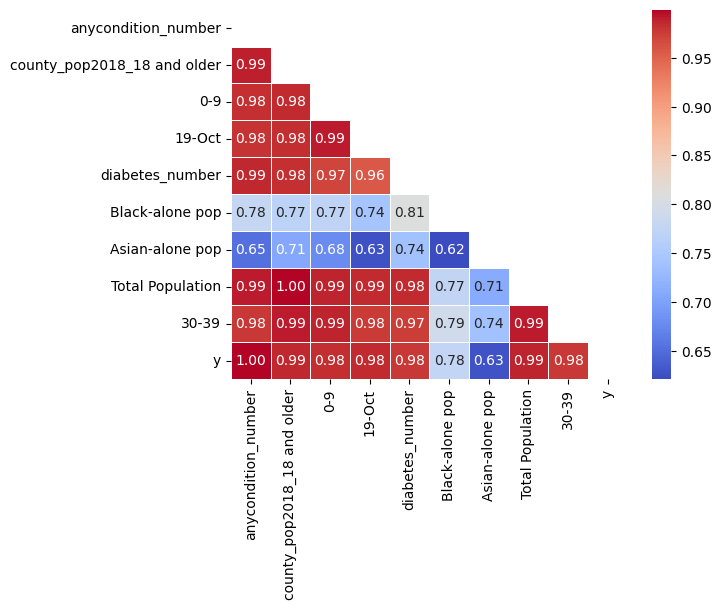

In [106]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

**CUANDO LO DE ANTES ESTÉ ARREGLADO, COMPRUEBA SI HA AFECTADO A LOS SIGUIENTES PASOS**

## Paso 3 - Escalado de Variables:

Una vez se tiene el **conjunto de datos depurado**, se debe preparar para **utilizar algoritmos de aprendizaje supervisado** como una Regresión Lineal, dado que así se puede asegurar que todos los cdatos **contribuyan de manera equitativa** al modelo. 

En este caso, se va a optar por un **escalado estándar** o de tipo normalización z-score, es decir, se transforma cada variable para que tenga una **media 0** y una **desviación estándar de 1**. 

In [107]:
# Se instancia un escalador normalizado:
scaler = StandardScaler();

# Se entrena el escalador y se escala el conjunto de entrenamiento:
X_train_sc = scaler.fit_transform(X_train);

# Se entrena el escalador y se escala el conjunto de test:
X_test_sc = scaler.transform(X_test);

## Paso 4 - Estudio de la Regresión Lineal:

Ahora que ya se tiene el conjunto de datos depurado y escalado, se puede proceder al **estudio de la Regresión Lineal con y sin Regularización**. 

Mientras que la **Regresión Lineal Tradicional** busca **minimizar el error sin restricciones**, los **modelos regularizados introducen términos de penalización** que afectan a los coeficientes del modelo. De esta forma, utilizan **hiperparámetros** que controlan la intensidad de la regularización, permitiendo así **equilibrar el ajuste del modelo y prevenir overfitting**

En este caso, para evaluar y comparar el desempeño de la Regresión Lineal Estándar, Lasso y Ridge, se van a utilizar métricas como el **R2**, **MAE** (Error Absoluto Medio) y **MAPE** (Error Absoluto Porcentual Medio), para analizar la **capacidad explicatica** del modelo como su **precisión en las predicciones** sobre el conjunto de test.  

Por este motivo, en primer lugar, se va a declarar una función que **calcule dichas métricas** y devuelva un Data Frame con la **información organizada**. Los **inputs** de esta función serán las **predicciones y los valores reales de la variable dependiente** para los conjuntos de **entrenamiento y test**. 

In [108]:
# Se declara una función que calcula las métricas para el conjunto de train y test y devuelve un Data Frame con los resultados y diferencias entre ambos conjuntos:
def get_metrics(yhat_test, y_test, yhat_train, y_train):

    # Se calculan las métricas para el conjunto de entrenamiento:
    metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100;
    
    # Se calculan las métricas para el conjunto de prueba:
    metrics_test = r2_score(y_test, yhat_test), median_absolute_error(y_test, yhat_test), mean_absolute_percentage_error(y_test, yhat_test)*100;
    
    # Se calcula la diferencia entre las métricas de entrenamiento y prueba:
    metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)));
    
    # Se devuelve un DataFrame con las métricas de entrenamiento, prueba y sus diferencias:
    return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'MAE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia']);

### Paso 4.1 - Regresión Lineal Estándar:

La regresión lineal estándar (sin regularización) es una técnica estadísitica basada en **modelar la relación** entre una **variable dependiente** y un conjunto de **variables independientes**, asumiendo una **relación lineal**. 

El modelo se basa en **minimizar el error** entre las predicciones y los valores reales, buscando los c**oeficientes que mejor expliquen la variabilidad** de los datos. 

Sin embargo, el principal problema que tiene este algoritmo es la **sensibilidad ante la presencia de multicolinealidad**, dado que puede producir un **sobreajuste**, afectando su capacidad de generalización. 

Para poder estudiar su comportamiento en este caso, se va a utilizar una instancia de la clase `LinearRegression()`y se va a **entrenar con los datos de entrenamiento**. 

Posteriormente, se va a utilizar el modelo para **predecir los valores de la variable objetivo**, *y*. Estas predicciones se denominarán con la coletilla *hat* para poder distinguir los valores reales de los predichos y poder así **evaluar la performance del modelo**. Con este objetivo, se va a utilizar el método `.predict()`.

In [109]:
# Se crea y ajusta el modelo de Regresión Lineal con el conjunto de train:
lineal_std_model = LinearRegression().fit(X_train_sc, y_train);

# Se obtiene la predicción de la variable objetivo en el conjunto de train:
yhat_train = lineal_std_model.predict(X_train_sc);

# Se obtiene la predicción de la variable objetivo en el conjunto de test:
yhat_test = lineal_std_model.predict(X_test_sc);

# Se llama a la función `get_metrics()` para obtener las métricas y evaluar la performance del modelo:
get_metrics(yhat_test, y_test, yhat_train, y_train)

,R2,MAE,MAPE
Train set,0.998346,187.295920,4.397268
Test set,0.998159,210.212437,4.460791
Diferencia,-0.000187,22.916517,0.063523


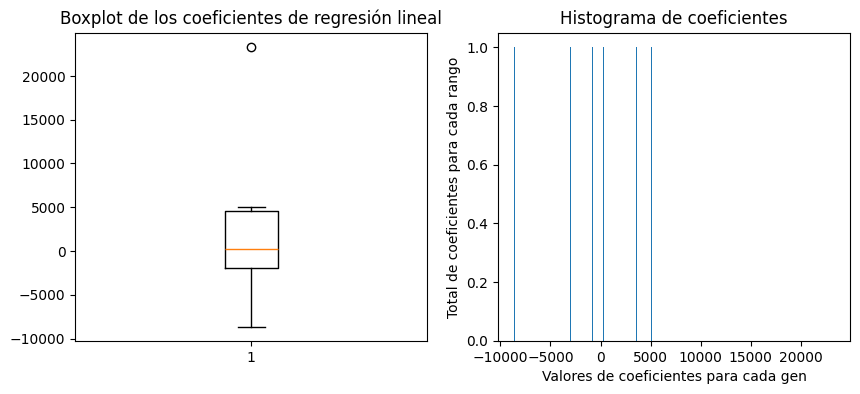

In [111]:
# Se traza la figura para los gráficos:
plt.figure(figsize=(10, 4));

# Boxplot:
plt.subplot(1, 2, 1);
plt.boxplot(lineal_std_model.coef_);
plt.title('Boxplot de los coeficientes de regresión lineal');

# Histograma:
plt.subplot(1, 2, 2);
plt.hist(lineal_std_model.coef_, 500);
plt.xlabel('Valores de coeficientes para cada gen');
plt.ylabel('Total de coeficientes para cada rango');
plt.title('Histograma de coeficientes');

plt.show();

HAZ AQUÍ UN ESTUDIO

### Paso 4.2. . Regresión Lineal Regularizada con Lasso:

La **Regresión Lineal Regularizada con Lasso** es una variante de la regresión lineal estándar que, a parte de tener como objetivo la **minimización del error**, aplica una **penalización sobre los coeficientes del modelo**. Esta penalización se logra mediante la inclusión de un **término de regularización** que tiende a hacer algunos **coeficientes 0**, permitiendo la **selección automática de características** más relevantes. 

Lasso es útil, por lo tanto, para **prevenir el sobreajuste** y mejorar la generalización del modelo, especialmente en conjuntos de datos con **alta colinealidad entre las variables**. 

La forma de proceder en este caso va a ser exactamente igual que para el paso anterior pero instanciando un objeto de la clase `LassoCV()`: 